In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Set a style for our plots
sns.set_style('whitegrid')

In [3]:
# Load the training data from the Kaggle URL
train_url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
train_df = pd.read_csv(train_url)

In [4]:
# Display the first few rows of the dataset
print("First 5 rows of the training data:")
print(train_df.head())

First 5 rows of the training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            

In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(train_df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-733361285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='viridis')


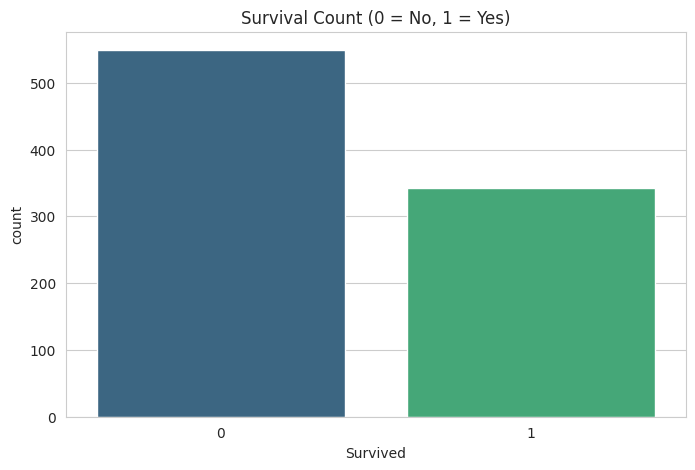

In [6]:
# Visualize survival counts
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_df, palette='viridis')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

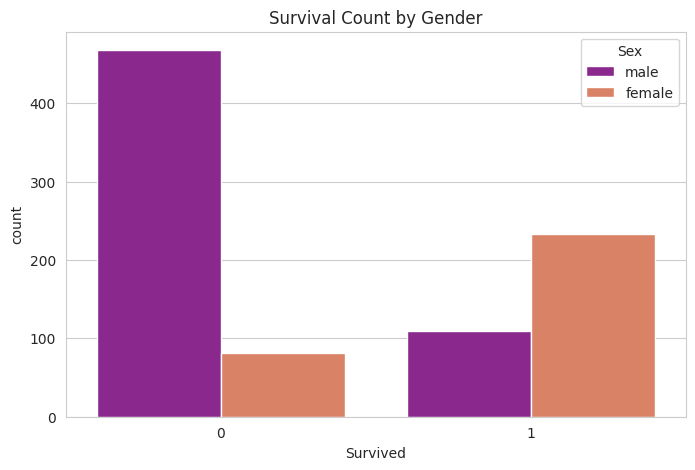

In [7]:
# Visualize survival based on Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='plasma')
plt.title('Survival Count by Gender')
plt.show()

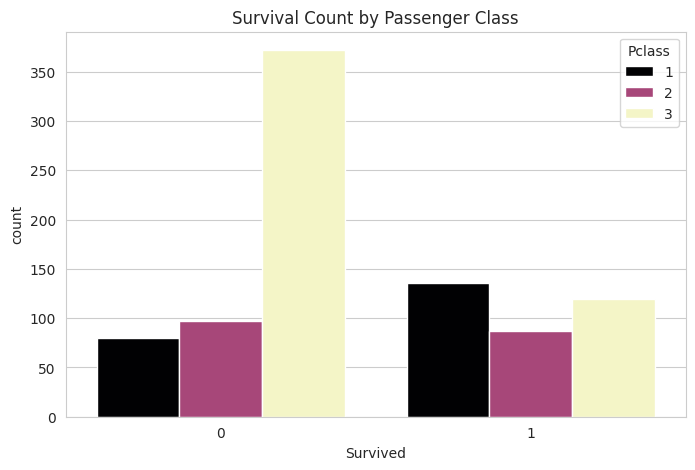

In [8]:
# Visualize survival based on Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=train_df, palette='magma')
plt.title('Survival Count by Passenger Class')
plt.show()

In [9]:
# Let's create a function to handle these cleaning steps
def preprocess_data(df):
    # Fill missing Age values with the median age of their passenger class
    df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

    # Fill the single missing Embarked value with the mode (most common port)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Drop columns that are not useful for prediction
    df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

    # Convert categorical features into dummy variables
    sex = pd.get_dummies(df['Sex'], drop_first=True, dtype=int)
    embark = pd.get_dummies(df['Embarked'], drop_first=True, dtype=int)

    # Drop the original categorical columns and add the new dummy columns
    df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
    df = pd.concat([df, sex, embark], axis=1)

    return df

In [10]:
# Apply the function to our training data
train_cleaned = preprocess_data(train_df)

/tmp/ipython-input-1193044649.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
print("\nCleaned Data Head:")
print(train_cleaned.head())


Cleaned Data Head:
   Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1


In [12]:
# Define features (X) and target (y)
X = train_cleaned.drop('Survived', axis=1)
y = train_cleaned['Survived']

In [13]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create and train the model
log_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_model.fit(X_train, y_train)

print("\nModel training complete.")


Model training complete.


In [15]:
# Make predictions on the test set
predictions = log_model.predict(X_test)

In [16]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [17]:
# Print the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, predictions)
print(cm)


Confusion Matrix:
[[91 14]
 [19 55]]


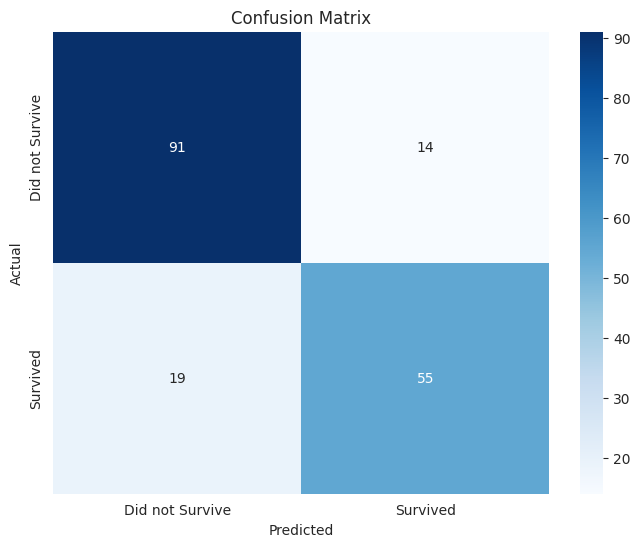

In [18]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
